In [1]:
import sysid
import pylab as pl
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ss1 = sysid.StateSpaceDiscreteLinear(
    A=0.9, B=0.5, C=1, D=0, Q=0.1, R=0.01, dt=0.1)
ss1

{'A': matrix([[ 0.9]]), 'C': matrix([[1]]), 'B': matrix([[ 0.5]]), 'D': matrix([[0]]), 'Q': matrix([[ 0.1]]), 'R': matrix([[ 0.01]]), 'dt': 0.1}

In [3]:
#pl.seed(1234)
prbs1 = sysid.prbs(1000)
def f_prbs(t, x, i):
    return prbs1[i]

In [4]:
tf = 10
data = ss1.simulate(f_u=f_prbs, x0=pl.matrix(0), tf=tf)
ss1_id = sysid.subspace_det_algo1(y=data.y, u=data.u,
    f=5, p=5, s_tol=1e-1, dt=ss1.dt)
data_id = ss1_id.simulate(f_u=f_prbs, x0=0, tf=tf)
ss1_id

{'A': matrix([[ 0.93539299]]), 'C': matrix([[ 1.]]), 'B': matrix([[ 0.41317547]]), 'D': matrix([[-0.07356581]]), 'Q': matrix([[ 0.]]), 'R': matrix([[ 0.]]), 'dt': 0.1}

fit 80.700497%


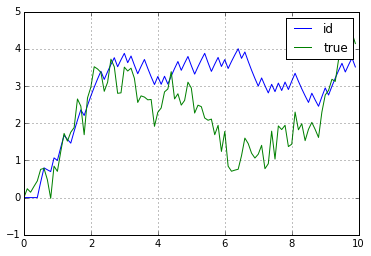

In [5]:
pl.plot(data_id.t.T, data_id.x.T, label='id');
pl.plot(data.t.T, data.x.T, label='true');
pl.legend()
pl.grid()
print 'fit {:f}%'.format(100*sysid.subspace.nrms(data_id.y, data.y))

In [10]:
ss2 = sysid.StateSpaceDiscreteLinear(
    A=pl.matrix([[0,0.1,0.2],[0.2,0.3,0.4],[0.4,0.3,0.2]]),
    B=pl.matrix([[1,0],[0,1],[0,-1]]),
    C=pl.matrix([[1,0,0],[0,1,0]]), D=pl.matrix([[0,0],[0,0]]),
    Q=pl.diag([0.1,0.1,0.1]), R=pl.diag([0.04,0.04]), dt=0.1)
ss2

{'A': matrix([[ 0. ,  0.1,  0.2],
        [ 0.2,  0.3,  0.4],
        [ 0.4,  0.3,  0.2]]), 'C': matrix([[1, 0, 0],
        [0, 1, 0]]), 'B': matrix([[ 1,  0],
        [ 0,  1],
        [ 0, -1]]), 'D': matrix([[0, 0],
        [0, 0]]), 'Q': matrix([[ 0.1,  0. ,  0. ],
        [ 0. ,  0.1,  0. ],
        [ 0. ,  0. ,  0.1]]), 'R': matrix([[ 0.04,  0.  ],
        [ 0.  ,  0.04]]), 'dt': 0.1}

In [11]:
pl.seed(1234)
prbs1 = sysid.prbs(1000)
prbs2 = sysid.prbs(1000)
def f_prbs_2d(t, x, i):
    i = i%1000
    return 2*pl.matrix([prbs1[i]-0.5, prbs2[i]-0.5]).T

In [18]:
tf = 10
data2 = ss2.simulate(
    f_u=f_prbs_2d, x0=pl.matrix([0,0,0]).T, tf=tf)
ss2_id = sysid.subspace_det_algo1(y=data2.y, u=data2.u,
    f=5, p=5, s_tol=0.2, dt=ss2.dt)
data2_id = ss2_id.simulate(
    f_u=f_prbs_2d,
    x0=pl.matrix(pl.zeros(ss2_id.A.shape[0])).T, tf=tf)
ss2_id

{'A': matrix([[-0.05755875, -0.17660036, -0.29554173, -0.25071959,  0.00392729],
        [ 0.04164197,  0.11602581,  0.45587632, -0.16832061, -0.12430457],
        [-0.1582767 ,  0.29836024,  0.37750429, -0.10469356,  0.24032873],
        [ 0.15532873, -0.07179496,  0.38630835, -0.36031955,  0.31685095],
        [-0.23064421, -0.02256004, -0.22619004, -0.70751769,  0.38555144]]), 'C': matrix([[-0.93945463, -2.68993062,  0.42581237,  0.03188834,  0.08001757],
        [ 3.09842575, -0.68871331,  0.01042302, -0.03632445,  0.25250828]]), 'B': matrix([[-0.06813682,  0.31705731],
        [-0.32617234, -0.12163298],
        [ 0.00185648,  0.03922622],
        [ 0.00361534,  0.01164307],
        [-0.02726748, -0.02735689]]), 'D': matrix([[ 0.01525047, -0.010225  ],
        [ 0.00913894, -0.05001643]]), 'Q': matrix([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]), 'R': matrix(

fit 88.180929%


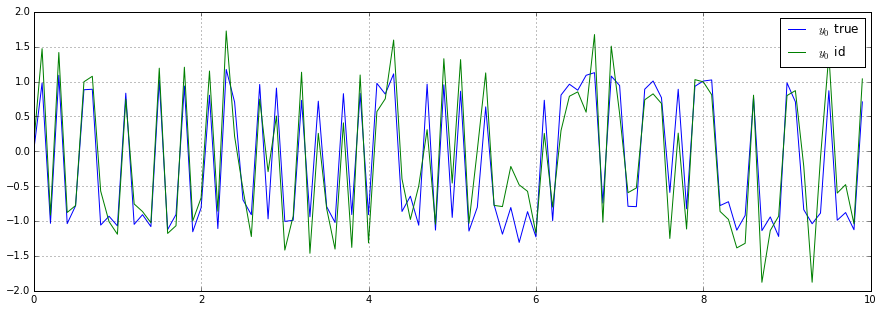

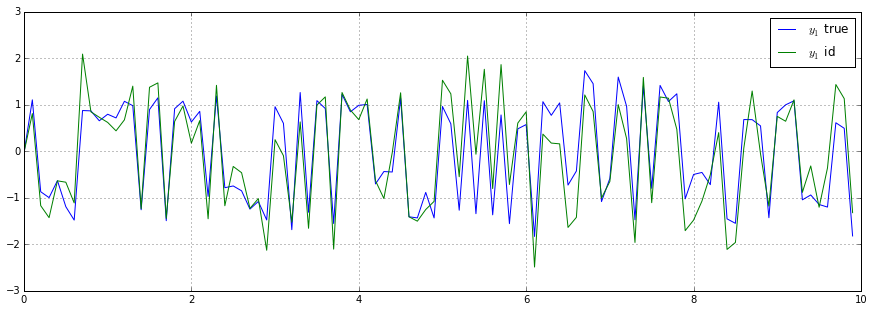

In [20]:
for i in range(2):
    pl.figure(figsize=(15,5))
    pl.plot(data2_id.t.T, data2_id.y[i,:].T,
            label='$y_{:d}$ true'.format(i))
    pl.plot(data2.t.T, data2.y[i,:].T,
            label='$y_{:d}$ id'.format(i))
    pl.legend()
    pl.grid()
print 'fit {:f}%'.format(100*sysid.subspace.nrms(
        data2_id.y, data2.y))